In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_excel('Default.xlsx', index_col=0)

/Users/adikondepudi/miniforge3/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
df.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


In [4]:
df.shape

(10000, 4)

In [5]:
df['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

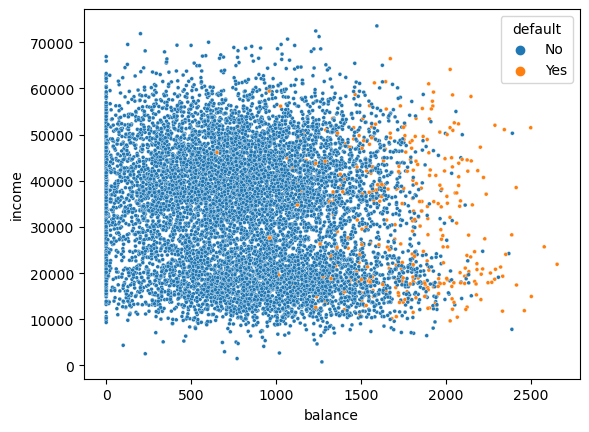

In [7]:
sns.scatterplot(x="balance", y="income", data= df, hue="default", s=8)
plt.show()

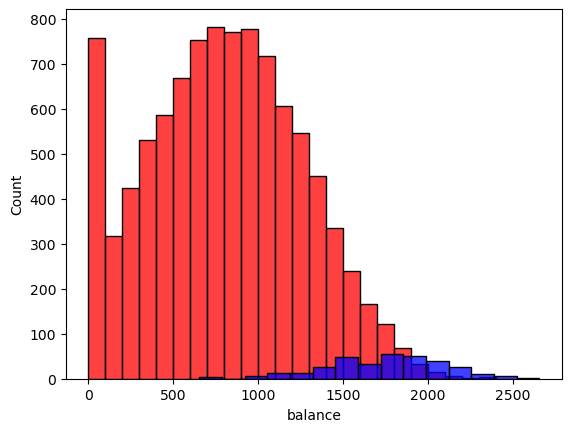

In [9]:
sns.histplot(data=df.loc[df.default=="No"], x="balance",color="red",binwidth=100)
sns.histplot(data=df.loc[df.default=="Yes"],x="balance",color="blue")
plt.show()

In [10]:
features = ['balance','income']
X = df[features]
y = [1 if el == 'Yes' else 0 for el in df.default.values]

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model = LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [13]:
print(model.intercept_)
print(model.coef_)

[-11.54047811]
[[5.64710797e-03 2.08091984e-05]]


/Users/adikondepudi/miniforge3/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


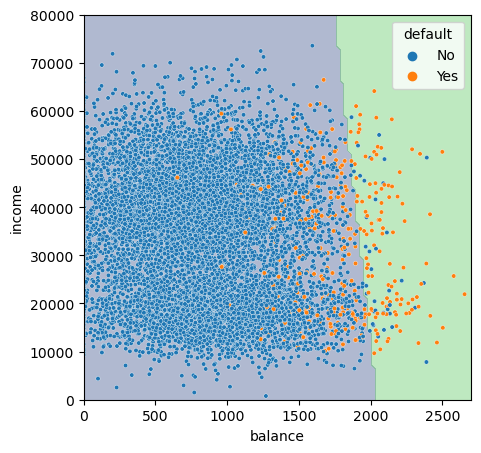

In [15]:
xp = np.linspace(0,2700,100)
yp = np.linspace(0,80000,100)
xx, yy = np.meshgrid(xp,yp)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
plt.figure(figsize=(5,5))
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4,levels=1)
sns.scatterplot(x="balance", y="income", data= df, hue="default", s=10)
plt.show()

In [16]:
ypred = model.predict(X)

In [17]:
from sklearn import metrics
print("confusion matrix")
print(metrics.confusion_matrix(y,ypred))

confusion matrix
[[9629   38]
 [ 225  108]]


In [18]:
THRESHOLD = 0.08

In [19]:
g = model.predict_proba(X)

In [20]:
ypred2 = np.where(g[:,1] > THRESHOLD, 1, 0)

In [21]:
A = metrics.confusion_matrix(y,ypred)
print(A)
B = metrics.confusion_matrix(y,ypred2)
print(B)

[[9629   38]
 [ 225  108]]
[[9002  665]
 [  75  258]]


In [22]:
print("Threshold = 0.5")
print("sensitivity = ", A[0,0]/9667)
print("specificity = ", 1-A[1,0]/333)
print("Threshold = ", THRESHOLD)
print("sensitivity = ", B[0,0]/9667)
print("specificity = ", 1-B[1,0]/333)

Threshold = 0.5
sensitivity =  0.9960691010654805
specificity =  0.32432432432432434
Threshold =  0.08
sensitivity =  0.9312092686459088
specificity =  0.7747747747747747


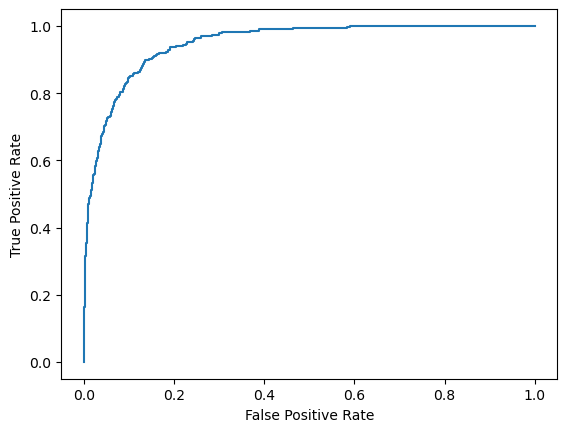

In [23]:
ypred_proba = model.predict_proba(X)[::,1]
fpr, tpr, _ = metrics.roc_curve(y, ypred_proba)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [24]:
auc = metrics.roc_auc_score(y, ypred_proba)
print(auc)

0.9490508404338962
